### Charger les bibliothèques

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import feature_column
import numpy as np

### Charger un fichier dans un dataframe pandas 

In [58]:
df_logement = pd.read_csv('./data/logement-encadrement-des-loyers.csv', sep=';')
df_logement.head()

,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,annee,ville,code_grand_quartier,geo_shape,geo_point_2d
0,11,77,Belleville,4,Avant 1946,non meublé,21.4,25.68,14.98,2020,PARIS,7512077,"{""type"": ""Polygon"", ""coordinates"": [[[2.383226...","48.8715312006,2.38754923985"
1,13,75,Amérique,3,1971-1990,non meublé,16.7,20.04,11.69,2020,PARIS,7511975,"{""type"": ""Polygon"", ""coordinates"": [[[2.409402...","48.8816381673,2.39544016662"
2,13,74,Pont-de-Flandre,2,1971-1990,meublé,20.2,24.24,14.14,2020,PARIS,7511974,"{""type"": ""Polygon"", ""coordinates"": [[[2.384878...","48.8955557746,2.38477722927"
3,13,75,Amérique,1,1971-1990,meublé,24.0,28.80,16.80,2020,PARIS,7511975,"{""type"": ""Polygon"", ""coordinates"": [[[2.409402...","48.8816381673,2.39544016662"
4,13,78,Saint-Fargeau,1,Avant 1946,meublé,29.4,35.28,20.58,2020,PARIS,7512078,"{""type"": ""Polygon"", ""coordinates"": [[[2.413813...","48.8710347391,2.40617153015"


Créer des colonnes séparé pour la latitude et la longitude

In [59]:
# Créer deux colonnes pour la latitute et la longitude
lat_lon = df_logement['geo_point_2d'].str.split(',', expand = True)
# Ajouter les colonnes au dataframe
df_logement['lat'] = lat_lon[0].astype(float)
df_logement['lon'] = lat_lon[1].astype(float)
# Supprimer les colonnes colonnes 
df_logement = df_logement.drop(['geo_shape', 'geo_point_2d'], axis=1)

df_logement.head()

,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,annee,ville,code_grand_quartier,lat,lon
0,11,77,Belleville,4,Avant 1946,non meublé,21.4,25.68,14.98,2020,PARIS,7512077,48.871531,2.387549
1,13,75,Amérique,3,1971-1990,non meublé,16.7,20.04,11.69,2020,PARIS,7511975,48.881638,2.395440
2,13,74,Pont-de-Flandre,2,1971-1990,meublé,20.2,24.24,14.14,2020,PARIS,7511974,48.895556,2.384777
3,13,75,Amérique,1,1971-1990,meublé,24.0,28.80,16.80,2020,PARIS,7511975,48.881638,2.395440
4,13,78,Saint-Fargeau,1,Avant 1946,meublé,29.4,35.28,20.58,2020,PARIS,7512078,48.871035,2.406172


In [60]:
df_logement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_zone              2560 non-null   int64  
 1   id_quartier          2560 non-null   int64  
 2   nom_quartier         2560 non-null   object 
 3   piece                2560 non-null   int64  
 4   epoque               2560 non-null   object 
 5   meuble_txt           2560 non-null   object 
 6   ref                  2560 non-null   float64
 7   max                  2560 non-null   float64
 8   min                  2560 non-null   float64
 9   annee                2560 non-null   int64  
 10  ville                2560 non-null   object 
 11  code_grand_quartier  2560 non-null   int64  
 12  lat                  2560 non-null   float64
 13  lon                  2560 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 280.1+ KB


In [61]:
df_logement.describe().T.apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
id_zone,2560.00000,6.66250,4.22558,1.00000,3.00000,5.00000,11.00000,14.00000
id_quartier,2560.00000,40.50000,23.09672,1.00000,20.75000,40.50000,60.25000,80.00000
piece,2560.00000,2.50000,1.11825,1.00000,1.75000,2.50000,3.25000,4.00000
ref,2560.00000,25.72723,4.18195,14.60000,22.90000,25.30000,28.30000,39.60000
max,2560.00000,30.87267,5.01834,17.52000,27.48000,30.36000,33.96000,47.52000
min,2560.00000,18.00906,2.92737,10.22000,16.03000,17.71000,19.81000,27.72000
annee,2560.00000,2020.00000,0.00000,2020.00000,2020.00000,2020.00000,2020.00000,2020.00000
code_grand_quartier,2560.00000,7511090.50000,599.81146,7510101.00000,7510595.75000,7511090.50000,7511585.25000,7512080.00000
lat,2560.00000,48.86099,0.01832,48.82313,48.84873,48.86245,48.87356,48.89556
lon,2560.00000,2.34392,0.03495,2.25228,2.32447,2.34488,2.36359,2.43318


### Séparer les données dans un lot d'entrainement, de validation et de test 

In [62]:
train_val, test = train_test_split(df_logement, test_size=0.2)
train, val = train_test_split(train_val, test_size=0.2)

print(len(train_val), "Examples pour l'Entrainement & Validation")
print(len(test), 'Examples pour les Tests')
print()
print(len(train), "Exemples pour l'entrainement")
print(len(val), 'Exemples pour la validation')

2048 Examples pour l'Entrainement & Validation
512 Examples pour les Tests

1638 Exemples pour l'entrainement
410 Exemples pour la validation


### Charger le fichier en mémoire 

In [63]:
def df_to_dataset(dataframe, label, shuffle=True, batch_size=32):
    
    df = dataframe.copy()
    labels = dataframe.pop(label)
    
    dataset = tf.data.Dataset.from_tensor_slices((dict(df), labels)) 
    
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(df), seed=23)
        
    dataset = dataset.batch(batch_size)
    
    return dataset   

In [64]:
train_dataset = df_to_dataset(train, label='ref', batch_size=5)
val_dataset = df_to_dataset(val, label='ref', batch_size=5)
test_dataset = df_to_dataset(test, label='ref', batch_size=5)

### Afficher les exemples

In [65]:
def show_data(dataset):
    
    for batch, labels in dataset.take(1):
        print('Labels:', labels.numpy())
        print()
        print('Features:\n')
        for key, value in batch.items():
            print('{}: {}'.format(key, value.numpy()))

In [66]:
show_data(train_dataset)

Labels: [25.3 22.9 28.7 27.7 22.7]

Features:

id_zone: [ 3 13  4  2  7]
id_quartier: [64 74 10  1 60]
nom_quartier: [b'Chaillot' b'Pont-de-Flandre' b'Enfants-Rouges'
 b"St-Germain-l'Auxerrois" b'Javel 15Art']
piece: [3 1 2 3 3]
epoque: [b'1946-1970' b'1946-1970' b'Apres 1990' b'Apres 1990' b'1946-1970']
meuble_txt: [b'non meubl\xc3\xa9' b'non meubl\xc3\xa9' b'meubl\xc3\xa9'
 b'meubl\xc3\xa9' b'non meubl\xc3\xa9']
ref: [25.3 22.9 28.7 27.7 22.7]
max: [30.36 27.48 34.44 33.24 27.24]
min: [17.71 16.03 20.09 19.39 15.89]
annee: [2020 2020 2020 2020 2020]
ville: [b'PARIS' b'PARIS' b'PARIS' b'PARIS' b'PARIS']
code_grand_quartier: [7511664 7511974 7510310 7510101 7511560]
lat: [48.868435 48.895557 48.863888 48.86065  48.83906 ]
lon: [2.2916791 2.3847773 2.3631234 2.3349104 2.2780764]


# Traitement des différentes type de colonnes

In [67]:
example_batch = next(iter(train_dataset))[0]

In [68]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())

### Numerique colonnes

La sortie d'une colonne de caractéristiques devient l'entrée du modèle. Une [colonne numérique](https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column) est le type de colonne le plus simple. Elle est utilisée pour représenter des caractéristiques ayant une valeur réelle. Lorsque vous utilisez cette colonne, votre modèle reçoit la valeur de la colonne de la base de données inchangée.

In [69]:
id_zone = feature_column.numeric_column('id_zone')
id_quartier = feature_column.numeric_column('id_quartier')
print(id_quartier)

NumericColumn(key='id_quartier', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [70]:
demo(id_quartier)

[[56.]
 [50.]
 [32.]
 [19.]
 [17.]]


### Bucketized Colonnes

Souvent, vous ne voulez pas introduire un nombre directement dans le modèle, mais plutôt diviser sa valeur en différentes catégories basées sur des plages numériques. Considérez les données brutes qui représentent les pieces. Au lieu de représenter les piseces sous la forme d'une colonne numérique, nous pourrions diviser les piece en plusieurs groupes en utilisant une [colonne divisée en groupes](https://www.tensorflow.org/api_docs/python/tf/feature_column/bucketized_column). Remarquez que les valeurs d'un seul coup ci-dessous décrivent la tranche de piece à laquelle chaque ligne correspond.

In [71]:
piece = feature_column.numeric_column('piece')
piece_buckets = feature_column.bucketized_column(piece, boundaries=[1, 3, 4, 6, 8])
demo(piece_buckets)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


### Colonne avec des données de type catégoriel

Dans cet ensemble de données, epoque est représenté par une chaîne de caractères (par exemple "Avant 1946", "Apres 1990" ou "1971-1990"). Nous ne pouvons pas alimenter directement un modèle avec des chaînes de caractères. Nous devons d'abord les faire correspondre à des valeurs numériques. Les colonnes de vocabulaire catégoriel permettent de représenter les chaînes de caractères sous forme de vecteur à un seul point (comme vous l'avez vu ci-dessus avec id_quartier). Le vocabulaire peut être transmis sous forme de liste en utilisant [categorical_column_with_vocabulary_list](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list), ou chargé à partir d'un fichier en utilisant [categorical_column_with_vocabulary_file](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_file).

In [72]:
epoques_ctg = df_logement['epoque'].unique().tolist()

epoques = feature_column.categorical_column_with_vocabulary_list(
      'epoque', epoques_ctg)

epoque_one_hot = feature_column.indicator_column(epoques)
demo(epoque_one_hot)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


### Encastrement des colonnes¶

Supposons qu'au lieu d'avoir seulement quelques chaînes de caractères possibles, nous ayons des milliers (ou plus) de valeurs par catégorie. Pour plusieurs raisons, à mesure que le nombre de catégories augmente, il devient impossible de former un réseau de neurones à l'aide de codages à chaud. Nous pouvons utiliser une colonne d'encastrement pour surmonter cette limitation. Au lieu de représenter les données sous la forme d'un vecteur monodimensionnel à plusieurs dimensions, une [colonne d'intégration](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column) représente ces données sous la forme d'un vecteur dense à plus faible dimension, dans lequel chaque cellule peut contenir n'importe quel nombre, et pas seulement 0 ou 1. La taille de l'encastrement (8, dans l'exemple ci-dessous) est un paramètre qui doit être ajusté.

Point clé : l'utilisation d'une colonne d'encastrement est optimale lorsqu'une colonne catégorielle comporte de nombreuses valeurs possibles. Nous en utilisons une ici à des fins de démonstration, vous avez donc un exemple complet que vous pouvez modifier pour un ensemble de données différent à l'avenir.

In [73]:
epoque_embedding = feature_column.embedding_column(epoques, dimension=4)
demo(epoque_embedding)

[[ 0.31198922  0.35518125 -0.71335083 -0.4082997 ]
 [ 0.41574216  0.21741985  0.08727659  0.1034406 ]
 [-0.0903829   0.8001104   0.4557351   0.28932282]
 [-0.43755737  0.19586706  0.73687744 -0.9873109 ]
 [-0.0903829   0.8001104   0.4557351   0.28932282]]


### Colonnes Hashed

Une autre façon de représenter une colonne catégorielle avec un grand nombre de valeurs est d'utiliser [categorical_column_with_hash_bucket](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_hash_bucket). Cette colonne de caractéristiques calcule une valeur de hachage de l'entrée, puis sélectionne un des lots de la taille du "hash_bucket" pour coder une chaîne. Lorsque vous utilisez cette colonne, vous n'avez pas besoin de fournir le vocabulaire, et vous pouvez choisir de rendre le nombre de hash_buckets significativement plus petit que le nombre de catégories réelles pour gagner de la place.

Point clé : Un inconvénient important de cette technique est qu'il peut y avoir des collisions dans lesquelles différentes chaînes sont associées au même lot. Dans la pratique, cela peut fonctionner correctement pour certains ensembles de données malgré tout.

In [74]:
epoque_hashed = feature_column.categorical_column_with_hash_bucket(
      'epoque', hash_bucket_size=1000)
demo(feature_column.indicator_column(epoque_hashed))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Colonnes de caractéristiques croisées

La combinaison de caractéristiques en une seule, mieux connue sous le nom de [caractéristiques croisées](https://developers.google.com/machine-learning/glossary/#feature_cross), permet à un modèle d'apprendre des poids distincts pour chaque combinaison de caractéristiques. Ici, nous allons créer une nouvelle caractéristique qui est le croisement de `piece` et du `id_zone`. Notez que `crossed_column` ne construit pas la table complète de toutes les combinaisons possibles (qui pourraient être très grandes). Elle est plutôt soutenue par une `colonne hachée`, ce qui vous permet de choisir la taille de la table.

In [75]:
crossed_feature = feature_column.crossed_column([piece_buckets, epoques], hash_bucket_size=1000)
demo(feature_column.indicator_column(crossed_feature))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Traitement de données géographique

De la même manière que les lignes divisent l'espace sur la carte quadrillée pour faciliter l'orientation et l'analyse géospatiale pour les humains, les colonnes bucketisées divisent la valeur continue des coordonnées en bacs pour faciliter l'apprentissage machine.

In [82]:
lat = feature_column.numeric_column('lat')
lon = feature_column.numeric_column('lon')

# Nombre de quartier à Paris
nb_bucket = len(df_logement['nom_quartier'].unique().tolist())

latbucket = list(np.linspace(start=48.82313, stop=48.89556, num=nb_bucket))
lonbucket = list(np.linspace(start=2.25228, stop= 2.406172, num=nb_bucket))

bucketized_lat = feature_column.bucketized_column(lat, boundaries=latbucket)
bucketized_lon = feature_column.bucketized_column(lon, boundaries=lonbucket)

demo(bucketized_lat)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.

Le modèle n'a toujours pas compris que la position géographique est en fait une concaténation des deux coordonnées.
Le croisement des coordonnées permet au modèle de "voir" l'image 2D de la carte, ce qui rend la formation beaucoup plus efficace

In [81]:
crossed_geo_2D = feature_column.crossed_column([bucketized_lat, bucketized_lon], hash_bucket_size=1000)
geo_2D_feature = feature_column.indicator_column(crossed_geo_2D)

demo(geo_2D_feature)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Choisir les caratéristiques à utiliser pour l'entrainement du model

In [77]:
# Caratéristique de type numerique
feature_columns = []

for header in ['id_zone', 'id_quartier', 'piece']:
    feature_columns.append(feature_column.numeric_column(header))
    
# Caratéristique de type numerique catégoriel
epoques_ctg = df_logement['epoque'].unique().tolist()
epoques = feature_column.categorical_column_with_vocabulary_list(
      'epoque', epoques_ctg)

feature_columns.append(feature_column.indicator_column(epoques))

### Ajouter les caractéristiques dans le modèle Keras

In [78]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

### Créer, compiler et entrainer le model

In [83]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])


model.compile(optimizer='adam',
              loss=tf.keras.mean_squared_error(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=5)

AttributeError: module 'tensorflow_core.keras' has no attribute 'mean_squared_error'

In [84]:
loss, accuracy = model.evaluate(test_dataset)
print("Accuracy", accuracy)

103/103 [==============================] - 0s 1ms/step - loss: -201541701.1262 - accuracy: 0.0000e+00
Accuracy 0.0


### Visualiser la courbe de la fonction de perte 

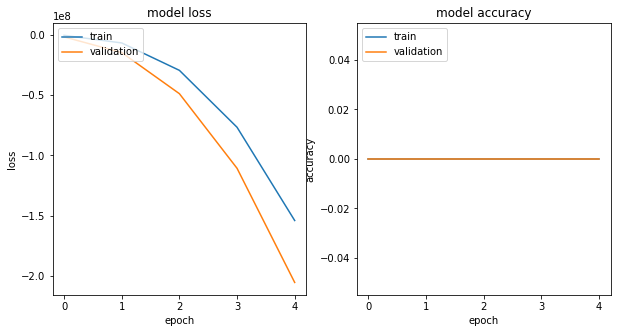

In [88]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');    
    
    
plot_curves(history, ['loss', 'accuracy'])

### Sources:

Traitement des données géographiques: [Codage des coordonnées géographiques à l'aide de colonnes de caractéristiques TensorFlow](https://medium.com/riga-data-science-club/geographic-coordinate-encoding-with-tensorflow-feature-columns-e750ae338b7c)

In [85]:
int(1e4)
np.random.choice([False, True], int(1e4))

array([ True,  True, False, ...,  True,  True,  True])